# Capture

In [3]:
push!(LOAD_PATH,"../src/")

# Pkg.add("Plots")
# Pkg.clone("https://github.com/RedPointyJackson/Brooglie")
using AnharmCaptureRate
using Plots
using DataFrames
# using Brooglie
using PyPlot

In [2]:
# Pkg.update()
ENV["PYTHON"]=""

""

In [10]:
# import data from two files
# Q (first column, amu) and E (second column, eV)
pot_1 = readtable("../src/Potential_1.csv")
pot_2 = readtable("../src/Potential_2.csv")
potential_matrix_1 = convert(Matrix, pot_1)
potential_matrix_2 = convert(Matrix, pot_2)
poly_order = 4;

In [11]:
potential_matrix_2

51×2 Array{Float64,2}:
 -20.0  20.3664 
 -19.0  18.4257 
 -18.0  16.631  
 -17.0  14.9712 
 -16.0  13.4363 
 -15.0  12.0173 
 -14.0  10.7064 
 -13.0   9.49579
 -12.0   8.37778
 -11.0   7.34617
 -10.0   6.39635
  -9.0   5.52476
  -8.0   4.72842
   ⋮            
  19.0   5.52476
  20.0   6.39635
  21.0   7.34617
  22.0   8.37778
  23.0   9.49579
  24.0  10.7064 
  25.0  12.0173 
  26.0  13.4363 
  27.0  14.9712 
  28.0  16.631  
  29.0  18.4257 
  30.0  20.3664 

In [12]:
cc = AnharmCaptureRate.calc_anharm_wave_func(potential_matrix_1, potential_matrix_2, poly_order, -20, 20, 500, 10);
# default values and inputs: calc_anharm_wave_func(potential_data_1::Array{Float64,2}, potential_data_2::Array{Float64,2}, 
    #poly_order =4, Qi=-10, Qf=10, NQ=100, nev=10)
# CaptureRate.plot_potentials(cc)
# ylims!(-2, 2)
# xlims!(-4, 3)

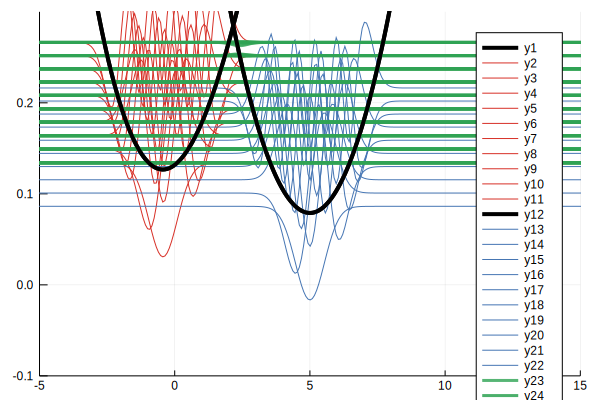

In [14]:
AnharmCaptureRate.calc_overlap!(cc; cut_off=0.25, σ=0.01)
# Excited state
plot!(cc.V1.Q, cc.V1.E, lw=4, color="black")
# Ground state
plot!(cc.V2.Q, cc.V2.E, lw=4, color="black")

ylims!(-0.1, 0.3)
xlims!(-5, 15)

# $\mathrm{GaN:C_N}$

In [ ]:
T_range = 1:10:800
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-11, 2E-8)

# $\mathrm{ZnO:Li_{Zn}}$

In [ ]:
cc = CaptureRate.calc_harm_wave_func(0.036, 0.025,
        -3.22, -0.46; Qi=-10, Qf=5, NQ=1000, nev=60)
CaptureRate.plot_potentials(cc)
ylims!(-2, 2)
xlims!(-10, 5)

In [ ]:
CaptureRate.calc_overlap!(cc; cut_off=0.5, σ=0.025)
T_range = 1:10:800
c = CaptureRate.calc_capt_coeff(3.9E-2, 1.136E-21, T_range, cc)
plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-8, 1E-5)

# $\mathrm{GaN:C_N}$

In [ ]:
cc = CaptureRate.calc_harm_wave_func(0.026, 0.022,
        -3.33, -0.88; Qi=-10, Qf=10, NQ=1000, nev=60)
CaptureRate.plot_potentials(cc)
ylims!(-2, 2)
xlims!(-10, 5)

In [ ]:
CaptureRate.calc_overlap!(cc; cut_off=0.5, σ=0.025)
T_range = 1:10:800
c = CaptureRate.calc_capt_coeff(3.9E-2, 1.136E-21, T_range, cc)
plot(T_range, c) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-10, 1E-6)